In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score

In [2]:
data = pd.read_csv('/content/data.csv')

In [3]:
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0,0,0
1,1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0,0,0
2,2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0,0,0
3,3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0,0,4
4,4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0,0,1


In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0,0,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0,0,0
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0,0,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0,0,4
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0,0,1


In [5]:
x=data[['Pclass','Sex','Age','Fare','Embarked','Title','FamilySize']]
y=data['Survived']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

model=LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

#Model Validation

##Confusion Matrix

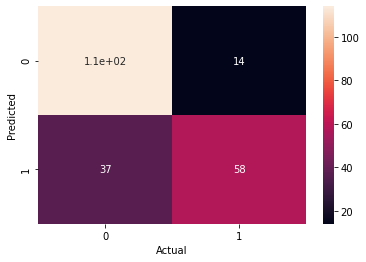

In [7]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True)

##ROC-AUC Curve



ROC-AUC is the model selection metric for classification problems

1.   ROC (Receiver Operating Characteristic) curve : It's a graph that provides a simple way to summarize all of the confusion matrices that each threshold (threshold value is between 0 and 1)produced, so it's an alternative to tons of confusion matrices.


*   x-axis: False Positive Rate = 1 - Specificity = FP/(FP+TN) :  it summarizes how often a positive class is predicted when the actual outcome is negative.
*   y-axis: True Positive Rate = Sensitivity = TP/(TP+FN) : It describes how good the model is at predicting the positive class when the actual outcome is positive.


*   ROC curve makes it easy to identify the best threshold




2.   AUC (Area Under the Curve): 



*   It's the area between the the ROC curve and the axis
*   The bigger the area covered , the better the machine Learning model is at distinguishing the given classes.
*   The perfect value for AUC is 1









In [8]:
#Predict probabilities for the test data
probs = model.predict_proba(x_test)
#Keep Probabilities of the positive class only
probs = probs[:, 1]

In [9]:
#Compute the AUC Score
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.83


In [10]:
#Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

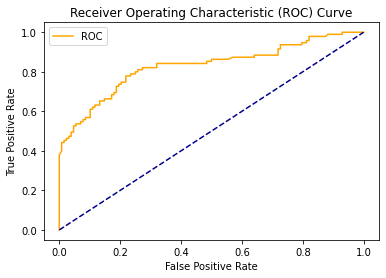

In [11]:
#Plot ROC Curve   
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()